**Average monthly earnings of employees by sex and economic activity**

# Import Data

Importing table from Github

In [1]:
!pip install -q gitpython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00


In [2]:
#IMPORTING LIBRARIES
import pandas as pd
import git
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
  git.Repo.clone_from('https://github.com/leticiacosta91/NewOfficial', 'Github')

except:
  print('Ok')

In [4]:
import pandas as pd
dataset = pd.read_csv('/content/Github/EAR_4MTH_SEX_ECO_CUR_NB_A-filtered-2023-07-14.csv')
dataset.head(5)

,ref_area.label,indicator.label,source.label,sex.label,classif1.label,classif2.label,time,obs_value,obs_status.label,note_classif.label,note_indicator.label,note_source.label
0,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Sex: Total,Economic activity (Aggregate): Total,Currency: Local currency,2021,4321.55,NaN,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
1,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Sex: Total,Economic activity (Aggregate): Total,Currency: 2017 PPP $,2021,5539.05,NaN,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
2,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Sex: Total,Economic activity (Aggregate): Total,Currency: U.S. dollars,2021,5111.28,NaN,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
3,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Sex: Total,Economic activity (Aggregate): Agriculture,Currency: Local currency,2021,3394.12,NaN,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...
4,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Sex: Total,Economic activity (Aggregate): Agriculture,Currency: 2017 PPP $,2021,4350.33,NaN,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...


# EDA

In [5]:
dataset.shape

(9443, 12)

In [6]:
dataset.isnull().sum()

ref_area.label             0
indicator.label            0
source.label               0
sex.label                  0
classif1.label             0
classif2.label             0
time                       0
obs_value                  0
obs_status.label        9443
note_classif.label      8447
note_indicator.label       0
note_source.label       2043
dtype: int64

In [7]:
df = dataset.drop('obs_status.label', axis= 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9443 entries, 0 to 9442
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ref_area.label        9443 non-null   object 
 1   indicator.label       9443 non-null   object 
 2   source.label          9443 non-null   object 
 3   sex.label             9443 non-null   object 
 4   classif1.label        9443 non-null   object 
 5   classif2.label        9443 non-null   object 
 6   time                  9443 non-null   int64  
 7   obs_value             9443 non-null   float64
 8   note_classif.label    996 non-null    object 
 9   note_indicator.label  9443 non-null   object 
 10  note_source.label     7400 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 811.6+ KB


In [9]:
df.columns = df.columns.str.replace('.label', '')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9443 entries, 0 to 9442
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ref_area        9443 non-null   object 
 1   indicator       9443 non-null   object 
 2   source          9443 non-null   object 
 3   sex             9443 non-null   object 
 4   classif1        9443 non-null   object 
 5   classif2        9443 non-null   object 
 6   time            9443 non-null   int64  
 7   obs_value       9443 non-null   float64
 8   note_classif    996 non-null    object 
 9   note_indicator  9443 non-null   object 
 10  note_source     7400 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 811.6+ KB


In [10]:
def get_unique(df, n_max = 32):
  for col in df.columns:
    print('-----------------')
    print(f'COLUMN: {col}')
    Value = df[col].unique()

    if len(Value) < n_max:
      for v in Value:
        print(f'  > {v}')

    else:
      print(f'  > More than {n_max} ({len(Value)} values)')

In [11]:
get_unique(df = df, n_max = 32)

-----------------
COLUMN: ref_area
  > Germany
  > France
  > Croatia
  > Ireland
  > Italy
  > Netherlands
-----------------
COLUMN: indicator
  > Average monthly earnings of employees by sex and economic activity
-----------------
COLUMN: source
  > HIES - EU Statistics on Income and Living Conditions
  > ES - Structure of Earnings Survey
  > LFS - Employment Survey
  > ES - Labour cost and Structure of Earnings annual Survey
  > ADM - Annual Statement of Social Data
  > ES - Annual Survey on persons in paid employment and gross and net Earnings
  > ES - Earnings Hours and Employment Costs Survey
  > ES - Labour-related Establishment Survey
-----------------
COLUMN: sex
  > Sex: Total
  > Sex: Male
  > Sex: Female
-----------------
COLUMN: classif1
  > Economic activity (Aggregate): Total
  > Economic activity (Aggregate): Agriculture
  > Economic activity (Aggregate): Manufacturing
  > Economic activity (Aggregate): Construction
  > Economic activity (Aggregate): Trade, Transportati

In [12]:
df['sex'] = df['sex'].apply(lambda x: pd.Series(x.split(': ')))[1]
df['classif2'] = df['classif2'].apply(lambda x: pd.Series(x.split(': ')))[1]
df[['classif1', 'sector']]= df['classif1'].apply(lambda x: pd.Series(x.split(': ')))

df.head(1)

,ref_area,indicator,source,sex,classif1,classif2,time,obs_value,note_classif,note_indicator,note_source,sector
0,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Total,Economic activity (Aggregate),Local currency,2021,4321.55,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...,Total


In [13]:
df.classif2.unique()

array(['Local currency', '2017 PPP $', 'U.S. dollars'], dtype=object)

In [14]:
df.sex.unique()

array(['Total', 'Male', 'Female'], dtype=object)

In [15]:
#cleaning data

df_2 = df[(df['classif2'] == 'Local currency') & (df['classif1'] == 'Economic activity (Aggregate)') & (df['ref_area'] != 'Croatia')]
df_2 = df_2.reset_index(drop=True)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ref_area        577 non-null    object 
 1   indicator       577 non-null    object 
 2   source          577 non-null    object 
 3   sex             577 non-null    object 
 4   classif1        577 non-null    object 
 5   classif2        577 non-null    object 
 6   time            577 non-null    int64  
 7   obs_value       577 non-null    float64
 8   note_classif    75 non-null     object 
 9   note_indicator  577 non-null    object 
 10  note_source     547 non-null    object 
 11  sector          577 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 54.2+ KB


In [16]:
df_2[:2]

,ref_area,indicator,source,sex,classif1,classif2,time,obs_value,note_classif,note_indicator,note_source,sector
0,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Total,Economic activity (Aggregate),Local currency,2021,4321.55,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...,Total
1,Germany,Average monthly earnings of employees by sex a...,HIES - EU Statistics on Income and Living Cond...,Total,Economic activity (Aggregate),Local currency,2021,3394.12,NaN,Currency: DEU - Euro (EUR),Repository: ILO-STATISTICS - Micro data proces...,Agriculture


In [17]:
def get_dados (df, year = 2007) :
 df = df[df['time'] == year]

 print (f'Year: {year}')
 print(' ')


 for c in df['ref_area'].unique():
  print('- - - - - - - - - - - - - - - - - - - - - - - - - - -')
  print(f'Country: {c}')
  for s in df['sector'].unique():

    error = 0

    print(f'  > {s}')
    dff = df[(df['ref_area'] == c) & (df['sector'] == s) ]

    try:
      m_value =   dff[dff['sex'] == 'Male']['obs_value'].values[0]

    except:
      print(f"      > Error on 'Male' filter")
      error = 1

    try:
      f_value =   dff[dff['sex'] == 'Female']['obs_value'].values[0]

    except:
      print(f"      > Error on 'Female' filter")
      error = 1

    if error == 0:

      dif_m_f = f_value - m_value
      perc_m_f = (f_value / m_value) - 1

      print(f"      > Female: {f_value :,.0f}")
      print(f"      > Male: {m_value:,.0f}")
      print(f"      > Dif : {dif_m_f:,.0f}")
      print(f"      > Perc : {perc_m_f:,.2%}")


In [18]:
get_dados(df_2,2021 )

Year: 2021
 
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Country: Germany
  > Total
      > Female: 3,424
      > Male: 5,113
      > Dif : -1,689
      > Perc : -33.03%
  > Agriculture
      > Female: 2,744
      > Male: 3,686
      > Dif : -941
      > Perc : -25.54%
  > Manufacturing
      > Female: 4,067
      > Male: 5,562
      > Dif : -1,495
      > Perc : -26.88%
  > Construction
      > Female: 2,886
      > Male: 4,089
      > Dif : -1,203
      > Perc : -29.43%
  > Trade, Transportation, Accommodation and Food, and Business and Administrative Services
      > Female: 3,242
      > Male: 5,038
      > Dif : -1,797
      > Perc : -35.66%
  > Public Administration, Community, Social and other Services and Activities
      > Female: 3,425
      > Male: 5,029
      > Dif : -1,604
      > Perc : -31.90%
  > Not classified
      > Female: 2,235
      > Male: 5,263
      > Dif : -3,027
      > Perc : -57.53%
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Country: Fr

In [19]:
def get_dados_c(df, year = 2007):
  df = df[df['time'] == year] #filtrando o dataframe

  print (f'Year: {year}')
  print(' ')

  for s in df['sector'].unique():
    print('- - - - - - - - - - - - - - - - - - - - - - - - - - -')
    print(f'{s}')
    for c in df['ref_area'].unique():

      error = False  #assumiu a var erro como zero

      dff = df[(df['ref_area'] == c) & (df['sector'] == s)] #filtro de país e setor

      try:
        m_value =   dff[dff['sex'] == 'Male']['obs_value'].values[0] # tenta pegar o valor do homem

      except:
        print(f"      > {c} : Error on 'Male' filter")
        error = True # encontrou um erro

      try:
        f_value =   dff[dff['sex'] == 'Female']['obs_value'].values[0] # tentar pegar o valor da mulher

      except:
        print(f"      > {c} : Error on 'Female' filter")
        error = True # erro encontrado

      if error == False: #verifica se houve um erro
        perc_m_f = (f_value / m_value) - 1

        print(f"      > {c} : {perc_m_f:,.2%}")


In [20]:
get_dados_c(df_2, 2021)

Year: 2021
 
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Total
      > Germany : -33.03%
      > France : -28.38%
      > Ireland : -26.92%
      > Italy : -22.75%
      > Netherlands : -29.87%
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Agriculture
      > Germany : -25.54%
      > France : -27.53%
      > Ireland : 36.82%
      > Italy : -17.98%
      > Netherlands : -34.02%
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Manufacturing
      > Germany : -26.88%
      > France : -15.51%
      > Ireland : -21.08%
      > Italy : -15.46%
      > Netherlands : -26.96%
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Construction
      > Germany : -29.43%
      > France : 4.32%
      > Ireland : -12.05%
      > Italy : 0.10%
      > Netherlands : -28.96%
- - - - - - - - - - - - - - - - - - - - - - - - - - -
Trade, Transportation, Accommodation and Food, and Business and Administrative Services
      > Germany : -35.66%
      > France : -26.29%
      > Irelan

# Inferential statistics

In [21]:
df_c = df_2.pivot_table(values='obs_value', index=['time', 'ref_area', 'sector'], columns=['sex'])

df_c = df_c.reset_index(drop = False)

df_c.head(3)

sex,time,ref_area,sector,Female,Male,Total
0,2011,France,Total,2469.00,3011.00,2787.00
1,2011,Germany,Agriculture,937.71,1751.06,1429.24
2,2011,Germany,Construction,1569.06,2363.65,2246.06


## Calculation of Confidence Intervals

In [22]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [23]:
def confidence_int(df, value_col, conf_level = 0.95):

  #getting list from df
  data = df[value_col].values

  #mean and standard deviation
  data_mean = np.mean(data)
  data_std = np.std(data, ddof=1)

  # Degrees of freedom
  d_free = len(data) - 1

  # Critical value
  crit_val = norm.ppf((1 + conf_level) / 2)

  # Margin of error
  moe = crit_val * data_std / np.sqrt(len(data))

  # Confidence interval
  conf_int = (data_mean - moe, data_mean + moe)


  d = df[value_col]

  print('max: ', d.max())
  print('min: ', d.min())
  print('Median: ', d.median())
  print("Mean: ", data_mean)
  print('Variance: ', np.var(d))
  print("Standard Deviation: ", data_std)
  print(f"Confidence interval ({conf_level:.0%}): ", conf_int)
  print("Skewness: ",  d.skew())
  print("Kurtosis: ",  d.kurt())

  sns.distplot(d);

max:  4370.74
min:  888.94
Median:  2598.9449999999997
Mean:  2654.9274193548385
Variance:  512119.91758903925
Standard Deviation:  717.5570593059417
Confidence interval (95%):  (2551.8061951081386, 2758.0486436015385)
Skewness:  0.12707716989520396
Kurtosis:  -0.5655935035078294


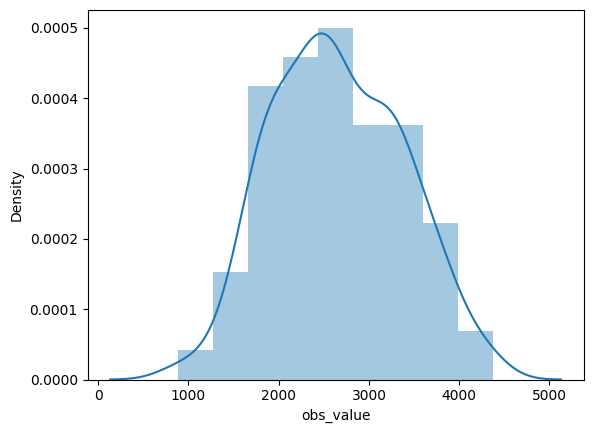

In [24]:
confidence_int(df = df_2[df_2['sex'] == 'Female'],
               value_col = 'obs_value',
               conf_level = 0.95)

max:  5966.34
min:  1491.78
Median:  3570.41
Mean:  3778.1567914438506
Variance:  1111714.950599331
Standard Deviation:  1057.2094932885002
Confidence interval (95%):  (3626.6303786308176, 3929.6832042568835)
Skewness:  0.05086925026311036
Kurtosis:  -0.8713470662569103


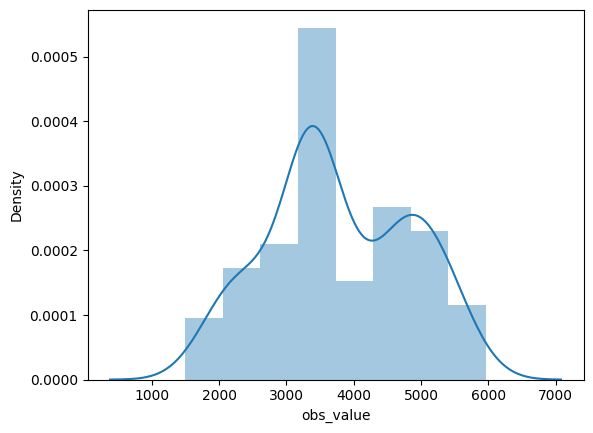

In [25]:
confidence_int(df = df_2[df_2['sex'] == 'Male'],
               value_col = 'obs_value',
               conf_level = 0.95)

max:  5541.41
min:  1429.24
Median:  3091.275
Mean:  3270.154460784314
Variance:  815422.1866560818
Standard Deviation:  905.2287250846755
Confidence interval (95%):  (3145.934515384743, 3394.3744061838847)
Skewness:  0.2979996165275309
Kurtosis:  -0.4935857218973543


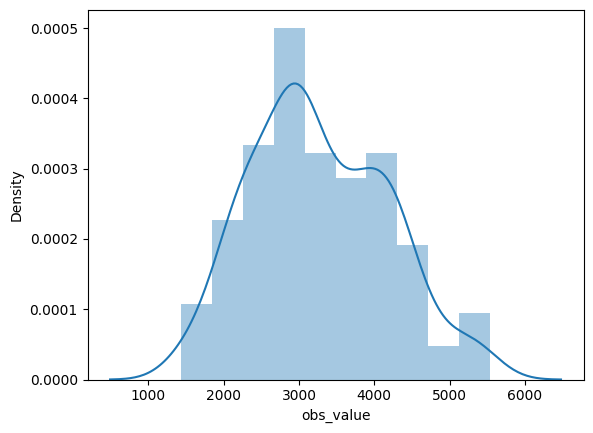

In [26]:
confidence_int(df = df_2[df_2['sex'] == 'Total'],
               value_col = 'obs_value',
               conf_level = 0.95)

max:  4370.74
min:  2980.46
Median:  3441.915
Mean:  3537.778333333333
Variance:  195168.94494722216
Standard Deviation:  483.9449699466527
Confidence interval (95%):  (3150.548823844949, 3925.0078428217175)
Skewness:  0.9978766958890816
Kurtosis:  1.2480885800209052


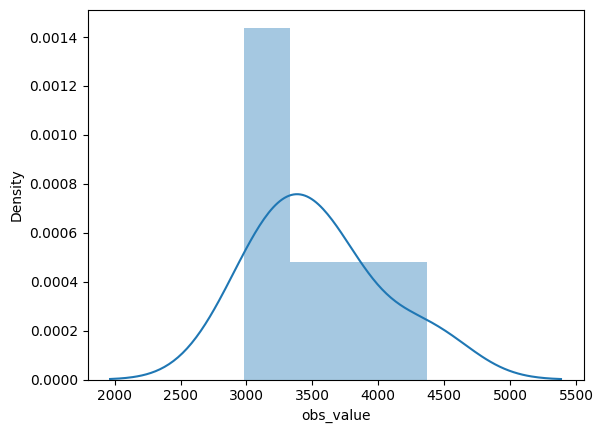

In [27]:
confidence_int(df = df_2[(df_2['ref_area'] == 'Ireland') & (df_2['sex'] == 'Female')],
               value_col = 'obs_value',
               conf_level = 0.95)

In [28]:
print(df_2.columns)

Index(['ref_area', 'indicator', 'source', 'sex', 'classif1', 'classif2',
       'time', 'obs_value', 'note_classif', 'note_indicator', 'note_source',
       'sector'],
      dtype='object')


In [29]:
def anova(df, value_col, year):
    anos = df[year].unique()
    dados_por_ano = []
    for ano in anos:
        dados = df[df[year] == ano][value_col].values
        dados_por_ano.append(dados)

    # Realizando o teste de ANOVA
    resultado_anova = f_oneway(*dados_por_ano)

    # Imprimindo o resultado
    print("Resultado do teste ANOVA:")
    print("Estatística F:", resultado_anova.statistic)
    print("Valor-p:", resultado_anova.pvalue)


In [30]:
anova(df=df_2, value_col='obs_value', year='time')

Resultado do teste ANOVA:
Estatística F: 6.763779031037587
Valor-p: 5.423295444765436e-10


#Descriptive Statistics

In [33]:
df_c.head(10)

sex,time,ref_area,sector,Female,Male,Total
0,2011,France,Total,2469.00,3011.00,2787.00
1,2011,Germany,Agriculture,937.71,1751.06,1429.24
2,2011,Germany,Construction,1569.06,2363.65,2246.06
3,2011,Germany,Manufacturing,2267.78,3238.50,2986.39
4,2011,Germany,"Public Administration, Community, Social and o...",1897.45,3109.09,2342.94
5,2011,Germany,Total,1855.81,3048.35,2486.44
6,2011,Germany,"Trade, Transportation, Accommodation and Food,...",1716.82,3044.77,2368.98
7,2011,Ireland,Total,NaN,NaN,3015.60
8,2011,Italy,Agriculture,1772.32,2166.67,2017.59
9,2011,Italy,Construction,2683.41,2713.64,2710.58


In [ ]:
# Finding specific statistics such as the mean:
mean_adm = df_c['Administration'].mean()
print(round(mean_adm, 2))